# NLP Classification - EDA

## Import Libraries

In [113]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

### Read Data
Read in cleaned data

In [114]:
df = pd.read_csv('../data/reddit_cleaned.csv')

In [115]:
df.head(3)

,subreddit,author,num_comments,selftext,title,text
0,playstation,Blix404,8,PlayStation. Why\n1st of PlayStation has been out since 2013 and you guys close to releasing the PS5 so why tf do you now all of a sudden start recording our party conversations.\n2nd of I ain’t getting banned just cause some snowflake in my party chat felt the need to snitch on me. Fuck outta here with that BS.\n\n3rd. Xbox Doesn’t do that so why do you feel the need to do that you dickheads....,PARTY CHAT BEING RECORDED,party chat be record why 1st of have be out since and you guy close to release the 5 so why tf do you now all of a sudden start record our party conversation 2nd of I ai not getting ban just cause some snowflake in my party chat feel the need to snitch on I fuck outta here with that bs 3rd do not do that so why do you feel the need to do that you dickhead just prove to be more and more of ...
1,playstation,ImmaPoodle,0,"So watch dogs legion is coming out soon and with interesting mechanics and ray tracing I think it might be what people thought watch dogs 2 would be... a predecessor to GTA 5, ok let's be honest watch dogs 2 was an amazing game but it lacked that feeling that GTA had as well as the already large player base.\n\nBut this time with already tons of preordered copies of watch dogs legion in circle...",Ubisoft vs Rockstar,ubisoft vs rockstar so watch dog legion be come out soon and with interesting mechanic and ray trace I think it might be what people think watch dog would be a predecessor to gta ok let us be honest watch dog be an amazing game but it lack that feeling that gta have as well as the already large player base but this time with already ton of preordere copy of watch dog legion in circle and ro...
2,playstation,georgios82,6,"So guys let me get this straight. If you want to temporarily invite someone to your party, then they will be automatically (permanently) added to the chat as well? Not only that but from my understanding they will also be able to see all older discussions that took place in that group? Am I missing something here? Is there a way to avoid this?",Question regarding the recent party changes,question regard the recent party change so guy let I get this straight if you want to temporarily invite someone to your party then they will be automatically permanently add to the chat as well not only that but from my understanding they will also be able to see all old discussion that take place in that group be I miss something here be there a way to avoid this


In [116]:
df.shape

(18664, 6)

In [117]:
df['subreddit'].value_counts(normalize=True).mul(100).round(2)

playstation    52.37
xbox           47.63
Name: subreddit, dtype: float64

### Calculate Data about Text
- Title Length
- Cleaned Text Word Count
- Cleaned Text Unique Word Count

In [118]:
# create new features and calculate length and counts
df['title_len'] = df['title'].map(len)

df['text_word_count'] = df['text'].map(lambda x: len(x.split()))

df['text_unique_words'] = df['text'].map(lambda x: len(np.unique(x.split())))

In [119]:
df.head(3)

,subreddit,author,num_comments,selftext,title,text,title_len,text_word_count,text_unique_words
0,playstation,Blix404,8,PlayStation. Why\n1st of PlayStation has been out since 2013 and you guys close to releasing the PS5 so why tf do you now all of a sudden start recording our party conversations.\n2nd of I ain’t getting banned just cause some snowflake in my party chat felt the need to snitch on me. Fuck outta here with that BS.\n\n3rd. Xbox Doesn’t do that so why do you feel the need to do that you dickheads....,PARTY CHAT BEING RECORDED,party chat be record why 1st of have be out since and you guy close to release the 5 so why tf do you now all of a sudden start record our party conversation 2nd of I ai not getting ban just cause some snowflake in my party chat feel the need to snitch on I fuck outta here with that bs 3rd do not do that so why do you feel the need to do that you dickhead just prove to be more and more of ...,25,136,89
1,playstation,ImmaPoodle,0,"So watch dogs legion is coming out soon and with interesting mechanics and ray tracing I think it might be what people thought watch dogs 2 would be... a predecessor to GTA 5, ok let's be honest watch dogs 2 was an amazing game but it lacked that feeling that GTA had as well as the already large player base.\n\nBut this time with already tons of preordered copies of watch dogs legion in circle...",Ubisoft vs Rockstar,ubisoft vs rockstar so watch dog legion be come out soon and with interesting mechanic and ray trace I think it might be what people think watch dog would be a predecessor to gta ok let us be honest watch dog be an amazing game but it lack that feeling that gta have as well as the already large player base but this time with already ton of preordere copy of watch dog legion in circle and ro...,19,232,124
2,playstation,georgios82,6,"So guys let me get this straight. If you want to temporarily invite someone to your party, then they will be automatically (permanently) added to the chat as well? Not only that but from my understanding they will also be able to see all older discussions that took place in that group? Am I missing something here? Is there a way to avoid this?",Question regarding the recent party changes,question regard the recent party change so guy let I get this straight if you want to temporarily invite someone to your party then they will be automatically permanently add to the chat as well not only that but from my understanding they will also be able to see all old discussion that take place in that group be I miss something here be there a way to avoid this,43,70,55


In [120]:
df.describe()

,num_comments,title_len,text_word_count,text_unique_words
count,18664.000000,18664.000000,18664.000000,18664.000000
mean,5.828547,44.806419,74.272021,45.992177
std,9.416717,32.068682,80.263581,32.324532
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,24.000000,35.000000,27.000000
50%,4.000000,37.000000,56.000000,39.000000
75%,7.000000,56.000000,89.000000,56.000000
max,328.000000,300.000000,3145.000000,1152.000000


It appears that there are some entries that have word counts of 0.

In [121]:
df.sort_values(by='text_word_count').head(20)

,subreddit,author,num_comments,selftext,title,text,title_len,text_word_count,text_unique_words
8983,playstation,JoeMamaGameEnded,17,Xbox,Xbox xbox xbox,,14,0,0
2076,playstation,jimmyinkxx93,1,Thoughts ?,https://m.youtube.com/watch?v=AWLj1cNqWOc,thought,41,1,1
1125,playstation,-mr-_-robot-,1,[https://www.youtube.com/watch?v=CaAY-jAjm0w](https://www.youtube.com/watch?v=CaAY-jAjm0w),PS5 Teardown,5 teardown,12,2,2
18525,xbox,PySnoo,0,**asdui7dyhqjwduqgusjdhas**,asdui7dyhqjwduqgusjdhas,asdui7dyhqjwduqgusjdhas asdui7dyhqjwduqgusjdhas,23,2,1
8999,playstation,jasonholland1,0,[https://www.youtube.com/watch?v=ndIhMezuPrY](https://www.youtube.com/watch?v=ndIhMezuPrY),Playstation Controller mod,controller mod,26,2,2
7045,playstation,xman73170,1,[https://store.playstation.com/en-us/product/UP0778-CUSA10115\_00-STARLITGAME00001](https://store.playstation.com/en-us/product/UP0778-CUSA10115_00-STARLITGAME00001),Free game!!!!,free game,13,2,2
1031,playstation,dylbull,10,^^^**,Servers down?,server down,13,2,2
6832,playstation,Z4C18,2,Tesg,Twsthdhdhehe,twsthdhdhehe tesg,12,2,2
15626,xbox,Application_Recent,2,Xbox code,Wow,wow code,3,2,2
723,playstation,UYBK201,0,[https://www.youtube.com/watch?v=UZ1C\_wNYTK0&amp;t=310s](https://www.youtube.com/watch?v=UZ1C_wNYTK0&amp;t=310s),Teardown Parody,teardown parody,15,2,2


We should be aware of the 0 word, and maybe 1-2 word total posts.  But let's continue to look at the data.

In [122]:
# how many posts have less than 5 words in cleaned text
len(df[df['text_word_count'] < 5])

38

In [123]:
df.groupby('subreddit').mean()

,num_comments,title_len,text_word_count,text_unique_words
subreddit,,,,
playstation,6.832532,47.002251,76.340153,47.076522
xbox,4.724491,42.391720,71.997750,44.799753


In [124]:
df.groupby('subreddit').median()

,num_comments,title_len,text_word_count,text_unique_words
subreddit,,,,
playstation,4.0,38.0,57.0,40.0
xbox,3.0,35.0,54.0,38.0


It looks like both subreddits are fairly similar, but the playstation subreddit does have higher numbers overall--in both mean and median values in all these areas.

Given that there are only 38 records with less than 5 words, I'm going to drop those records.

In [125]:
df.drop(df[df['text_word_count'] < 5].index, inplace=True)

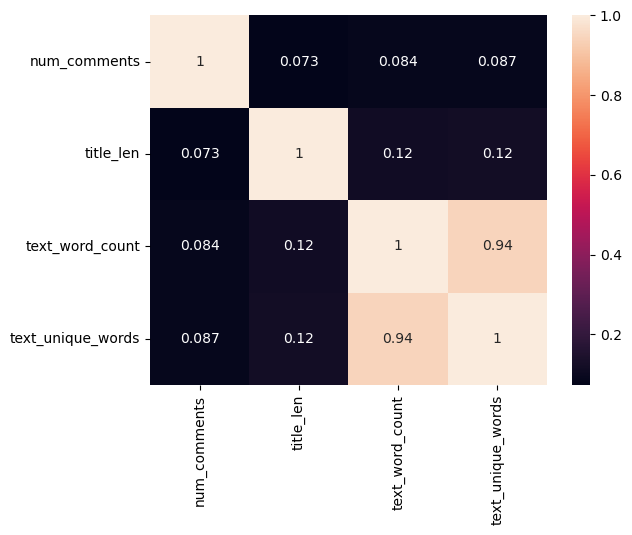

In [126]:
sns.heatmap(df.corr(),
            annot=True);

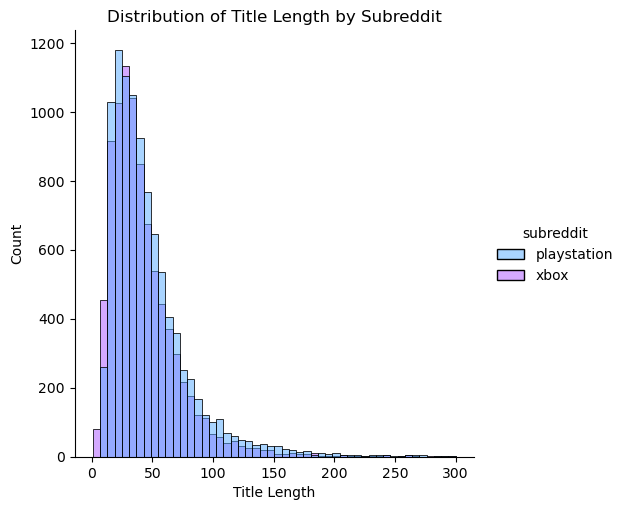

In [127]:
sns.displot(data=df,
            x='title_len',
            hue='subreddit',
            palette='cool',
            height=5,
            bins=50).set(title='Distribution of Title Length by Subreddit',
                         xlabel='Title Length');

# plt.suptitle('Distribution of Title Length by Subreddit');

Overall, the distributions of the title lengths are similar between both subreddits, but there appear to be more playstation related content that have longer titles.

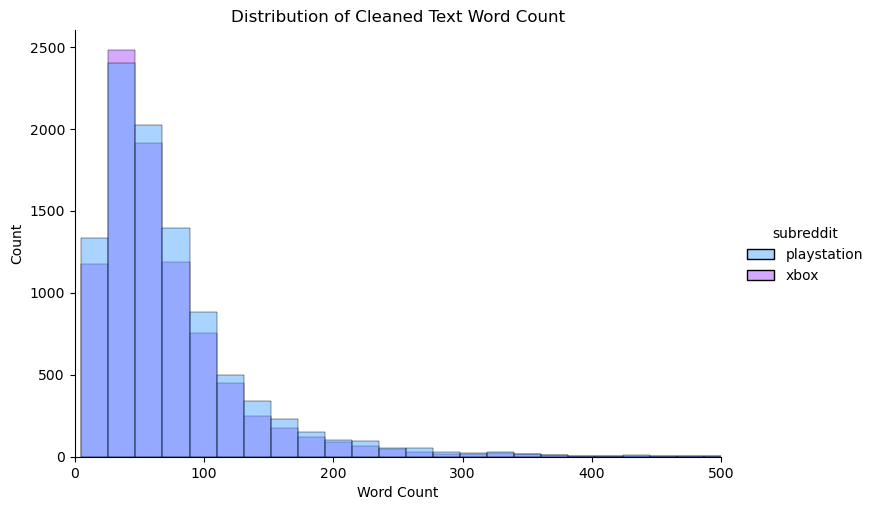

In [128]:
sns.displot(data=df,
            x='text_word_count',
            hue='subreddit',
            palette='cool',
            aspect=1.5,
            bins=150).set(title='Distribution of Cleaned Text Word Count',
                          xlabel='Word Count',
                          xlim=(0, 500));

Again, we see very similar distributions for both subreddits, but in the places where you can distinction, it appears that playstation is a bit wordier than xbox data.

Since we'll need some amount of words for the classification to work, let's see how many entries we have with 15 words or fewer.

In [129]:
df[df['text_word_count'] <= 15].groupby('subreddit')[['text_word_count']].count()

,text_word_count
subreddit,
playstation,449
xbox,418


That may be a lot to drop, but since it's relatively even, it may not be so bad.  Let's look at 10 and fewer.

In [130]:
df[df['text_word_count'] <= 10].groupby('subreddit')[['text_word_count']].count()

,text_word_count
subreddit,
playstation,158
xbox,157


This might be better.  We should probably check to see if this impacts our classifiers, when we get to that.

Unique Words

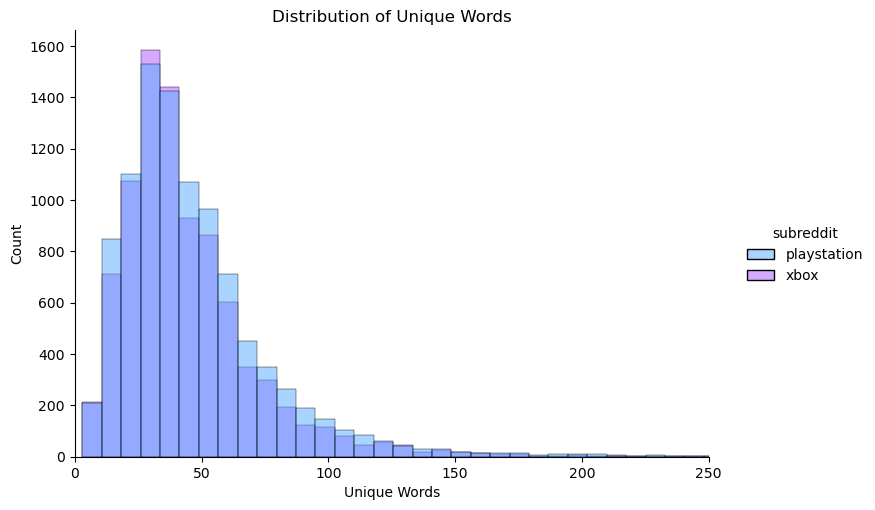

In [131]:
sns.displot(data=df,
            x='text_unique_words',
            hue='subreddit',
            palette='cool',
            aspect=1.5,
            bins=150).set(title='Distribution of Unique Words',
                          xlabel='Unique Words',
                          xlim=(0, 250));

Number of comments per post by subreddit

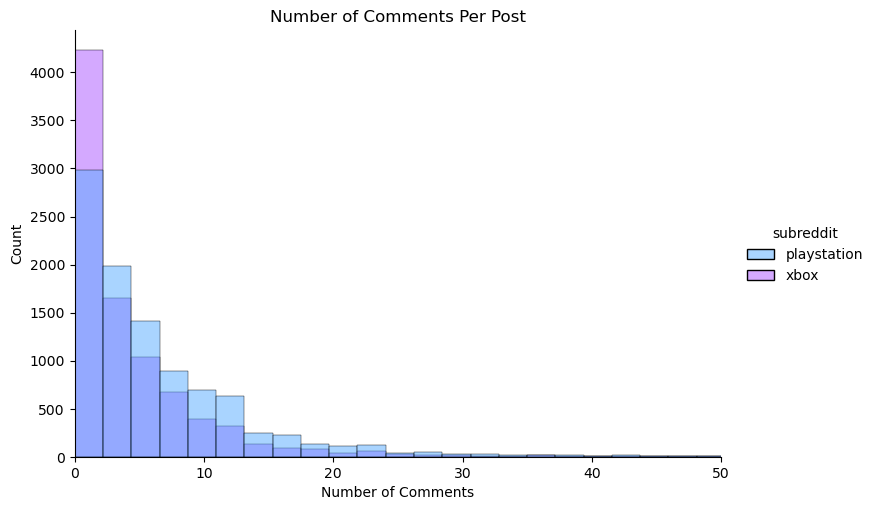

In [132]:
sns.displot(data=df,
            x='num_comments',
            hue='subreddit',
            palette='cool',
            aspect=1.5,
            bins=150).set(title='Number of Comments Per Post',
                          xlabel='Number of Comments',
                          xlim=(0, 50));

The plot above is a zoomed in, meaning that I am focusing on a smaller X-axis range to get a better view.  Here we see that Xbox posts generally had fewer comments per post than playstation posts.

Look at the top 10 longest text blocks

In [133]:
df.sort_values(by='text_word_count', ascending=False)[['text']].head(10)

,text
15523,debunk do phil spencer really shoot down xcloud on switch the definitive analysis this start out as a simple reply to a comment but turn into a hour long writing session of a huge wall of text hope you can still read it though as it will answer all your question and doubt context I make a video on why master chief in smash make perfect sense as a marketing buzz for xcloud on switch as well a...
1797,now be really under appreciated okay so I know from the start this be a flawed argument because game pass have all of the studio game on there and straight away on release so consider that if do that it would imo be the hand down winner but even without these just look at the list and you will see how much value you be get oof all now game a a boy and his blob abzu ace of the luftwaffe ac...
8566,just experience the bad customer service I ve ever have I would like to start off by say need to readdress how they ago about recover a n account I provide of the information request because the other be something that could be change at any give time but customer service would not help at all a bit of a backstory I do not play my all the time I play it from time to time when I want to che...
9919,list of game that will boost your gamerscore for the hof event look to compete for the hof event maybe you just want that sweet 10k reward for get 10k gamerscore before the 19th or maybe you be just look to boost your gamerscore look no far as this be the guide for you all game list have estimate completion time between hour below be a list for people too lazy to click the link 112th seed ...
16009,dear and phil spencer a letter to dear and phil spencer I be hope this find you happy healthy hopeful and well I want to preface all of this by say that I be primarily on 4 when it come to gaming and I own and love my switch but until last december I have never own let alone play an I be curious though and as I be listen to phil spencer more and more read about gamepass view their adaptive...
5858,today I end up speak to my own account hacker okay so bear with I because this be a somewhat long story but it literally just happen today and I be still pretty dumbfounded so a bit of background this weekend I lose my internet because the people redo our driveway accidentally cut the service cable so I be currently post this use a hotspot off my phone it be also how I be able to use internet ...
14883,on improve the elite controller stick option and add they to the accessibility options for series x or one hello everyone for those unaware those who own elite controller for the one have access to additional customization over the basic button remappe normal controller user have some of these feature be because of the add addition to the elite controller but what I will be focus on be the ...
9974,which next gen console have the most consumer friendly storage choice after warranty expire note this post be base on the post manufacturer warranty lifecycle aka after year I ve see other eagle eyed redditor mention this previously but in the late video from spawn wave it show the sere be actually use what appear to be a m ssd for the internal drive which be replaceable rather than solder...
11783,proof that have a single batch of console for the series s and hold all access back so that people could buy the console outright first here be my transcript below with a ms associate and supervisor sam hello we apologize for the long wait on the queue as we be experience huge volume of chat request as of this moment I be sam how may I help you today sep sep you hi early at am I be ref...
4275,4 save datum and capture medium recovery about a week ago I decide to buy a bunch of game I be interested because of the summer sale I game and decide to download they all at once silly I think my day one 4 could handle that amount of processing power all at once suffice to say my 4 froze and would not respond to any input I check my mobile phone app and it say that I be 

### Investigate Word Counts

Will use a CountVectorizer in order to see the most and least common words in the text.

In [134]:
cv = CountVectorizer(stop_words='english')

In [135]:
# fit and store the transformed data (sparse matrix)
df_cv = cv.fit_transform(df['text'])

In [136]:
# convert sparse matrix to dataframe
df_cv = pd.DataFrame(df_cv.todense(),
                     columns=cv.get_feature_names_out())

In [137]:
df_cv.shape

(18626, 17420)

#### Show the 20 most common words

In [138]:
df_cv.sum().sort_values(ascending=False)[:20]

game          18369
play           7869
just           7274
buy            5992
account        5431
know           5327
try            5071
like           4892
ve             4414
use            4392
help           4218
say            4025
work           4022
want           4014
controller     3960
console        3803
new            3760
series         3480
time           3447
make           2981
dtype: int64

#### Show the 20 frequency of the most common words as a bar chart

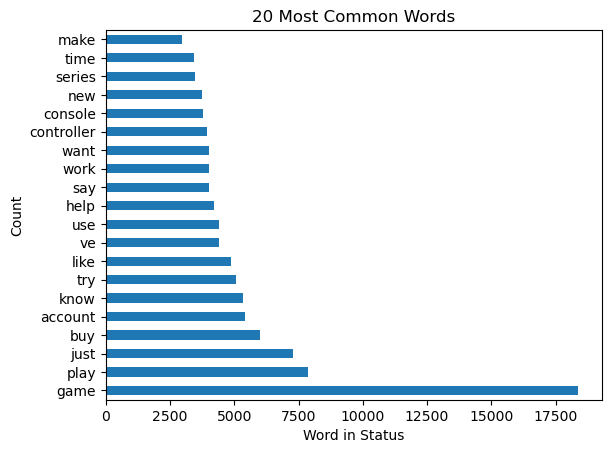

In [139]:
df_cv.sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.title('20 Most Common Words')
plt.xlabel('Word in Status')
plt.ylabel('Count');

Not surprising that words like game, play, controller, and console all show up here, given the context of the subject matter.

#### Show the 20 least common words

In [140]:
df_cv.sum().sort_values(ascending=True)[:20]

killfeed       1
mah            1
mainland       1
maintainer     1
maintanence    1
maintence      1
maintinance    1
maisie         1
maize          1
majima         1
majornelson    1
maked          1
makeshift      1
makinh         1
makoto         1
malaysia       1
maleware       1
malfuction     1
magus          1
malwarebyte    1
dtype: int64

Nothing very interesting here.

#### Longest and shortest titles

In [141]:
# five longest titles
df.sort_values(by='title_len', ascending=False)[['title']].head()

,title
10730,I have 1.25 credit in my Microsoft account and I need to buy buy the game pass for 1$ but I don’t have any more money in my account to pay for the monthly renewal. I don’t even have any payment cards in the first place. Is there any way to skip it or get a gamepass ‘code’ for 1$ from somewhere else?
13559,I have heard that the Xbox Elite controller V2 has had problems. I am thinking about buying one because my elite controller from the first generation is broken. Did Xbox fix the xbox elite v2 controllers with their new batch of controllers? Because maybe only the early production ones had issues?
1533,Been hearing about this for awhile now on social media that the XSX is more powerful than the PS5 but i saw the comparison and to be absolutely honest I'm not seeing that much of a difference between them but the main argument is that the XSX can do 4k/60 while the PS5 can't so what do you think?
4562,[Question] My internet has gone off for the 2nd time in two days (probably bc of the weather). When this happens I get a message from Sony that says that they cannot verify my license to play any digitally purchased game and I have 15 minutes to reconnect before the game closes. Is this normal??
1938,I pre ordered a ps5 and I kno it comes with a basic hdmi 2.1 cable but I want to kno(btw i have a Samsung 4k uhd tv) if I should spend 50 to a 100 dollars on some other better hdmi 2.1 cables? I've been looking at audio quest I'd love feedback and some links to the best hdmi 2.1 4k 120 Hertz


In [142]:
# five shortest titles
df.sort_values(by='title_len', ascending=True)[['title']].head()

,title
14210,?
14066,.
11211,4K
18663,MW
18481,Hi


#### Unique Authors

Let's look at unique post authors in this data.

In [143]:
df.columns

Index(['subreddit', 'author', 'num_comments', 'selftext', 'title', 'text',
       'title_len', 'text_word_count', 'text_unique_words'],
      dtype='object')

In [144]:
df['author'].nunique()

15375

In [145]:
len(df) - df['author'].nunique()

3251

In [146]:
df.groupby('subreddit')[['author']].nunique()

,author
subreddit,
playstation,8003
xbox,7539


In [147]:
df['subreddit'].value_counts()

playstation    9753
xbox           8873
Name: subreddit, dtype: int64

Again, these subreddits are very similar in composition, but here the Xbox subreddit has a higher percentage of unique authors creating posts.

### Stop Words, Bigrams, and Trigrams

After performing some modeling and seeing that in some cases bigrams and trigrams were the best fit during some of the grid searching, I thought it might be interesting to look at some of the bigrams and trigrams that come from vectorizing the text.  In this section, I'll investigate both CountVectorizer and TfidfVectorizer and look at the top bigrams and trigrams to see if there are any patterns of interest that should be addressed with some additional cleaning perhaps.

We'll also look at the impact that stop words may have on features here as well. Above we saw that CountVectorizer on the `text` feature yielded `17431` columns/features with English stop words.  Let's see without stop words.

In [148]:
ngrams_cv = CountVectorizer()

In [149]:
no_stop = ngrams_cv.fit_transform(df['text'])

In [150]:
# assemble a dataframe from the transformed data
no_stop = pd.DataFrame(no_stop.todense(), 
                       columns=ngrams_cv.get_feature_names_out())
no_stop.shape

(18626, 17710)

Difference of almost 300 columns, which I believe matches approximately with the length of the stop word list.  I think this difference may become more pronounced when we start examinging the ngrams.

In [151]:
# tokens and bigrams
ngrams_cv = CountVectorizer(ngram_range=(1, 2))
no_stop_bigrams = ngrams_cv.fit_transform(df['text'])
no_stop_bigrams.shape

(18626, 276956)

In [152]:
ngrams_cv = CountVectorizer(stop_words='english', ngram_range=(1, 2))
stop_bigrams = ngrams_cv.fit_transform(df['text'])
stop_bigrams.shape

(18626, 274612)

~2400 feature/column difference when enabling/disabling stop_words and setting the ngram range to 1,2

let's take a look at the bigrams without stop words and see what bigrams are common.  For this exploration, we'll limit to the top 500 features, so we can actually see what they are and not run into memory issues.

In [153]:
ngrams_cv = CountVectorizer(stop_words='english', 
                            max_features=500,
                            ngram_range=(2, 2))
stop_bigrams = ngrams_cv.fit_transform(df['text'])

In [154]:
bigrams_df = pd.DataFrame(stop_bigrams.todense(), 
                          columns=ngrams_cv.get_feature_names_out())

bigrams_df.head(3)

,3rd party,4k tv,able download,able play,able use,aca neogeo,access account,access game,account able,account account,...,work help,work just,work perfectly,work try,work ve,worth buy,year ago,year old,year ve,zero dawn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
bigrams_df.sum().sort_values(ascending=False).head(20)

game pass        1852
pre order        1473
play game        1267
ve try            737
hard drive        649
buy game          627
need help         552
game like         482
game play         475
want play         457
pass ultimate     435
just want         410
able play         400
download game     396
thank advance     348
feel like         348
buy new           331
game game         318
gift card         317
live gold         313
dtype: int64

In [156]:
ngrams_cv = CountVectorizer(ngram_range=(2, 2), 
                            max_features=500)
no_stop_bigrams = ngrams_cv.fit_transform(df['text'])

In [157]:
no_stop_bi = pd.DataFrame(no_stop_bigrams.todense(),
                          columns=ngrams_cv.get_feature_names_out())
no_stop_bi.head(3)

,able to,about it,about the,access to,account and,account be,account on,all access,all my,all of,...,would be,would like,would not,year ago,you be,you can,you do,you guy,you have,you think
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
no_stop_bi.sum().sort_values(ascending=False).head(20)

do not        7243
it be         4958
can not       3861
on the        3525
be not        3226
want to       3094
the game      3032
of the        2772
in the        2668
try to        2598
for the       2523
to get        2434
to play       2412
on my         2380
to the        2374
be the        2187
go to         2181
and it        2166
my account    2010
be there      1938
dtype: int64

The bigrams when using stop words certainly seem more relevant than the ones without stop words.  "do not", "it be", "can not" don't seem very relevant to either subreddit.  I might consider removing stop words in cleaning.  Let's first look at trigrams in the same way.

In [159]:
ngrams_cv = CountVectorizer(stop_words='english', 
                            max_features=500, 
                            ngram_range=(3, 3))
stop_trigrams = ngrams_cv.fit_transform(df['text'])

In [160]:
trigrams_df = pd.DataFrame(stop_trigrams.todense(), 
                          columns=ngrams_cv.get_feature_names_out())

trigrams_df.head(3)

,3rd party controller,3rd party game,able access game,able buy game,able download game,able play game,able play online,able play series,able pre order,able run game,...,wave pre order,way play game,windows media imaging,work fine yesterday,work just fine,work perfectly fine,work ve try,year ago buy,year game pass,year live gold
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
trigrams_df.sum().sort_values(ascending=False).head(20)

game pass ultimate         431
external hard drive        199
filler filler filler       158
game pass pc               148
hour guide buy             116
game game pass              99
game pass game              90
able play game              89
horizon zero dawn           82
buy game pass               81
month game pass             78
help greatly appreciate     74
just want know              73
pre order series            68
want play game              68
red dead redemption         67
elite series controller     60
account got hack            58
spider man mile             57
long story short            54
dtype: int64

In [162]:
ngrams_cv = CountVectorizer(ngram_range=(3, 3), 
                            max_features=500)
no_stop_tri = ngrams_cv.fit_transform(df['text'])

In [163]:
no_stop_tri = pd.DataFrame(no_stop_tri.todense(),
                          columns=ngrams_cv.get_feature_names_out())
no_stop_tri.head(3)

,able to get,able to play,able to use,account on my,all my game,all of my,all of the,all the game,an issue with,and be not,...,would be great,would be greatly,would have to,would like to,would love to,you can not,you do not,you guy think,you have to,you want to
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [164]:
no_stop_tri.sum().sort_values(ascending=False).head(20)

be able to            1665
do not have           1020
do not know           1015
it do not              765
be go to               652
do anyone know         598
be there any           574
and do not             562
be try to              543
but do not             534
do not want            531
be wonder if           513
it be not              509
do not work            460
and can not            454
not want to            450
game pass ultimate     426
want to play           423
and it be              415
but can not            390
dtype: int64

Similarly to what we saw with bigrams, it would appear that having stop words gives a bit more meaning behind the words, and not common phrases like "be able to", or "do not have".

I am interested in seeing how these bigram and trigram lists might change when using the TfidfVectorizer.  Since we've seen that including stop words gives us more meaningful results, we'll just look at those lists.

In [165]:
ngrams_tf = TfidfVectorizer(stop_words='english', 
                            max_features=500,
                            ngram_range=(2, 2))
tf_stop_bigrams = ngrams_tf.fit_transform(df['text'])

In [166]:
tf_bigrams_df = pd.DataFrame(tf_stop_bigrams.todense(), 
                            columns=ngrams_tf.get_feature_names_out())

tf_bigrams_df.head(3)

,3rd party,4k tv,able download,able play,able use,aca neogeo,access account,access game,account able,account account,...,work help,work just,work perfectly,work try,work ve,worth buy,year ago,year old,year ve,zero dawn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
tf_bigrams_df.sum().sort_values(ascending=False).head(20)

pre order         603.132076
game pass         482.605204
play game         379.030415
ve try            241.900370
need help         230.779166
buy game          205.911382
hard drive        197.174832
game play         177.269121
game like         174.738149
just want         173.170401
want play         159.592257
thank advance     153.591543
able play         150.902558
download game     145.205274
feel like         140.724948
ghost tsushima    139.293444
gift card         136.527029
want know         134.137629
pass ultimate     132.716772
buy new           131.130940
dtype: float64

In [168]:
ngrams_tf = TfidfVectorizer(stop_words='english', 
                            max_features=500,
                            ngram_range=(3, 3))
tf_no_stop_tri = ngrams_tf.fit_transform(df['text'])

In [169]:
tf_trigrams_df = pd.DataFrame(tf_no_stop_tri.todense(), 
                          columns=ngrams_tf.get_feature_names_out())

tf_trigrams_df.head(3)

,3rd party controller,3rd party game,able access game,able buy game,able download game,able play game,able play online,able play series,able pre order,able run game,...,wave pre order,way play game,windows media imaging,work fine yesterday,work just fine,work perfectly fine,work ve try,year ago buy,year game pass,year live gold
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
tf_trigrams_df.sum().sort_values(ascending=False).head(20)

game pass ultimate           180.577183
external hard drive          105.985188
game pass pc                  73.854905
horizon zero dawn             60.248479
just want know                59.796721
help greatly appreciate       55.900169
able play game                55.232659
game game pass                49.592242
red dead redemption           47.076881
elite series controller       46.630325
account got hack              46.456164
want play game                46.170618
game pass game                44.506698
pre order series              44.478204
long story short              43.279166
make new account              42.096911
game ve play                  41.744452
buy game pass                 40.485502
month game pass               38.916779
backwards compatible game     37.238846
dtype: float64

There are differences in the two vectorizers, though much of the top 20 look very similar.  In reading through these, it feels like Tfidf is a little more meaningful with its approach to looking at frequency instead of pure counting, but we'll see what bears out in the modeling and grid searching. I don't think I'll go back through and remove stop words in the cleaning stage at this point, mainly because there are mechanisms in the vectorizers that can deal with them.

## Notes

### Cleaning feedback:
- Consider removing the word `game` as it appears in most posts

### Modeling  feedback:
- Consider using only word counts > 10 or > 15 for X
- If needing to cut down gridsearch fits, lean towards using english stop words instead of both, None and english